##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Model tuning with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/model-tuning/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on ai.google.dev</a>
  </td>
    <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this notebook, you'll learn how to get started with the tuning service using the Python client library for the Gemini API. Here, you'll learn how to tune the text model behind the Gemini API's text generation service.

## Setup

### Install the client library

In [3]:
!pip install -q google-generativeai

### Import libraries

In [4]:
import google.generativeai as genai

In [5]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

You can check you existing tuned models with the `genai.list_tuned_model` method.

In [14]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-2632
tunedModels/chatbot-num-61


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [7]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [8]:
import random

name = f'chatbot-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': 'Apakah program Digital Talent Scholarship dipungut biaya?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Benefit apa yang didapatkan oleh peserta DTS yang sudah menyelesaikan pelatihan?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Berapa banyak beasiswa yang diberikan dalam program Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Siapa saja yang bisa mengikuti program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Apakah bisa mendaftar 2 pelatihan sekaligus?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apakah data identitas diri yang sudah disubmit bisa diedit kembali?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah lulusan SMK, D3, D4, dan S1 membutuhkan surat rekomendasi dari guru/dosen untuk mendaftar?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah saya bisa membatalkan pelatihan walaupun sudah mengikuti test substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah yang dimaksud dengan peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa saja data yang wajib disiapkan untuk pendaftaran?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Apa yang harus dilakukan ketika kode OTP tidak masuk ke E-mail atau nomor handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Bagaimana cara melihat pengumuman hasil seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Bagaimana cara membuat Akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Bagaimana teknis pembelajaran DTS?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Bagaimana cara mendaftar pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Bagaimana cara mengatasi permasalahan Login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Bagaimana caranya Peserta DTS 2019 s.d 2023 yang ingin kembali mendaftar pelatihan di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Bagaimana jika NIK/E-mail/No. HP saya sudah terdaftar?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Bagaimana jika peserta sudah daftar tapi lupa unduh bukti pendaftaran?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Bagaimana jika saya lupa password akun DTS?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Bagaimana jika terjadi kendala saat upload dokumen dan foto?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Jika masih belum memiliki KTP, nomor identitas apa yang bisa di submit untuk mendaftar Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Peserta yang sudah pernah ikut DTS apakah bisa ikut lagi? Kalau bisa, harus menggunakan akun sebelumnya atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apa itu tes substansi dan kenapa harus melakukannya?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa yang harus dilakukan jika gagal dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Bagaimana cara mengetahui hasil tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Bagaimana jika terjadi kendala jaringan / server pada saat mengerjakan tes substansi?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan �Javascript Enabled�.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Berapa lama waktu pengerjaan tes substansi?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Kenapa status tes substansi belum/ tidak berubah?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Seberapa sulit tes substansi?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Apakah ikut pelatihan wajib tidak bekerja?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Apakah pelatihan DTS ini hanya bisa diikuti secara online saja?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Apakah semua peserta mendapatkan biaya komunikasi?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Bagaimana cara mencari pelatihan yang sesuai dengan domisili saat ini?',
             'output': 'Peserta dapat mencari tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Bagaimana Jadwal dan Jam Pelatihan Digital Talent Scholarship 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Bagaimana jika ingin mengikuti satu pelatihan namun sudah terdaftar di pelatihan lain?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Bagaimana jika peserta mengundurkan diri pada saat pelatihan berjalan?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Kenapa status pelatihan tidak langsung terupdate pada website setelah pelatihan sudah selesai?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi �Lulus� atau �Tidak Lulus�, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Spesifikasi komputer seperti apa yang dibutuhkan untuk ikut setiap pelatihan?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Apakah sertifikat dari DTS cukup kuat untuk melamar pekerjaan?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Bagaimana cara download sertifikat DTS?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Bagaimana caranya mendownload sertifikat yang tahun lalu sudah diikuti?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Bagaimana ketika setelah mengikuti pelatihan tetapi sertifikat tidak kunjung keluar /didapatkan?',
             'output': 'Silahkan melapor ke admin pelatihan dan pastikan juga sudah memenuhi syarat kelulusan (contoh: lulus tes substansi, kehadiran, nilai mid tes, dan sudah isi survey evaluasi)',
        },{
             'text_input': 'Info Sertifikat DTS',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Apakah Digital Talent Scholarship ini menyediakan lapangan pekerjaan setelah selesai pelatihan?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Bagaimana cara alumni DTS membuat akun di Platform Diploy?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Bisakah Platform Diploy diakses oleh umum atau yang belum registrasi dan mengikuti Pelatihan di DTS?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Setelah mengikuti pelatihan DTS apakah yang harus saya lakukan?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Apa itu Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru 2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi 3. Thematic Academy (TA) - Pelatihan Tematik 4. Professional Academy (ProA) - Pekerja Terampil 5. Government Transformation Academy (GTA) - Aparatur Sipil Negara 6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM 7. Digital Leadership Academy (DLA) - Pimpinan Digital 8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Selamat pagi',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Pagi, bagaimana kabarnya?',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat pagi semuanya!',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Halo, selamat pagi!',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Pagi!',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Hai, pagi!',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat siang!',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat sore',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat malam',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Kriteria peserta seperti apa yang dapat mengikuti program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Apakah bisa mendaftar 2 pelatihan sekaligus?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apakah peserta dapat mendaftar dua pelatihan sekaligus?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apakah mungkin untuk mengikuti dua pelatihan sekaligus?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Siang!',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Pagi',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Hai, selamat siang!',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat siang admin',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Hai, selamat siang',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Siang kak',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'halo Selamat siang!',
             'output': 'Hai, selamat siang! Semoga Anda tetap bersemangat sepanjang hari. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Sore!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Halo, selamat sore!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Hai, selamat sore!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Sore mas',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Malam!',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat sore teman!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Halo, selamat sore!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat sore, admin!',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat malam semuanya!',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Halo, selamat malam!',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat malam kak!',
             'output': 'Hai, selamat malam! Semoga malam Anda penuh dengan kedamaian. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Malam min!',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat malam min!',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Malam admin',
             'output': 'Hai, selamat malam! Semoga tidur Anda nyenyak dan penuh mimpi indah. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Malam mas!',
             'output': 'Hai, selamat malam! Semoga tidur Anda penuh ketenangan dan kenyamanan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Selamat malam mas!',
             'output': 'Hai, selamat malam! Semoga Anda memiliki malam yang penuh kedamaian. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Apa itu Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Apa yang dimaksud dengan Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Apa yang disebut sebagai Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Apa saja benefit yang diperoleh peserta yang telah menuntaskan pelatihan DTS?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Manfaat apa yang bisa didapatkan oleh peserta setelah menyelesaikan pelatihan DTS?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Apakah yang dimaksud dengan program Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Bagaimana penjelasan mengenai Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Bisakah mendaftar lebih dari satu pelatihan dalam waktu yang sama?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apakah diperbolehkan mengambil dua pelatihan secara bersamaan?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apa yang dimaksud oleh Digital Talent Scholarship?',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi3. Thematic Academy (TA) - Pelatihan Tematik4. Professional Academy (ProA) - Pekerja Terampil5. Government Transformation Academy (GTA) - Aparatur Sipil Negara6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM7. Digital Leadership Academy (DLA) - Pimpinan Digital8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Apakah ada biaya untuk mengikuti program Digital Talent Scholarship?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Apakah peserta perlu membayar untuk mengikuti Digital Talent Scholarship?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Apakah program Digital Talent Scholarship gratis?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Apakah mengikuti Digital Talent Scholarship memerlukan biaya?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Apakah ada pungutan biaya untuk program Digital Talent Scholarship?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Apakah program Digital Talent Scholarship dipungut biaya?',
             'output': 'Seluruh proses seleksi untuk mengikuti Program Digital Talent Scholarship tidak dipungut biaya apapun atau gratis.',
        },{
             'text_input': 'Benefit apa yang didapatkan oleh peserta DTS yang sudah menyelesaikan pelatihan?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Apa saja manfaat yang diperoleh peserta DTS setelah menyelesaikan pelatihan?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Apa keuntungan yang didapatkan peserta DTS setelah mengikuti pelatihan?',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Apa tindakan yang perlu diambil jika tes substansi tidak berhasil dilalui?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa saja keuntungan bagi peserta yang telah menyelesaikan pelatihan dalam program D',
             'output': 'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi GlobalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih',
        },{
             'text_input': 'Berapa banyak beasiswa yang diberikan dalam program Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Ada berapa banyak beasiswa yang ditawarkan dalam Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Berapa kuota beasiswa yang disediakan dalam program Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Berapa banyak penerima beasiswa di program Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Berapa total beasiswa yang diberikan melalui Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Siapa saja yang bisa mengikuti program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Siapa yang memenuhi syarat untuk mengikuti program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Siapa saja yang berhak mendaftar dalam program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Siapa yang dapat berpartisipasi di program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Siapa yang bisa menjadi peserta program Digital Talent Scholarship?',
             'output': 'Program Digital Talent Scholarship terbuka bagi seluruh lapisan masyarakat Indonesia dengan syarat memiliki NIK.',
        },{
             'text_input': 'Apakah peserta bisa mengikuti dua program pelatihan sekaligus?',
             'output': 'Tidak bisa mendaftar 2 pelatihan DTS sekaligus. Jika ingin mengikuti lebih dari 1 pelatihan, harus sudah menyelesaikan pelatihan sebelumnya sampai mendapat sertifikat.',
        },{
             'text_input': 'Apakah data identitas diri yang sudah disubmit bisa diedit kembali?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah data identitas yang telah dikirim dapat diubah lagi?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah mungkin untuk mengedit kembali data diri yang sudah disubmit?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Bisakah data identitas yang sudah diunggah diperbarui?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah data diri yang sudah diisi bisa diubah setelah disubmit?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah ada opsi untuk mengedit data identitas setelah pengiriman?',
             'output': 'Perubahan data seperti nama, NIK, tangal lahir, dan jenis kelamin tidak bisa diubah kembali setelah proses input dalam akun. Sedangkan untuk data email dan No Handphone dapat diubah melalui akun masing-masing peserta.',
        },{
             'text_input': 'Apakah lulusan SMK, D3, D4, dan S1 membutuhkan surat rekomendasi dari guru/dosen untuk mendaftar?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah lulusan SMK, D3, D4, dan S1 perlu surat rekomendasi dari guru atau dosen untuk mendaftar?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah pendaftar dengan latar belakang SMK, D3, D4, dan S1 harus menyertakan surat rekomendasi dari guru atau dosen?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah lulusan SMK, D3, D4, dan S1 wajib memiliki surat rekomendasi dari guru atau dosen untuk mendaftar?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah calon peserta lulusan SMK, D3, D4, dan S1 memerlukan surat rekomendasi dari guru/dosen untuk pendaftaran?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Bagaimana cara mengatasi jika kode OTP tidak masuk ke E-mail atau nomor handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Apakah lulusan jenjang SMK, D3, D4, dan S1 membutuhkan rekomendasi dari guru atau dosen saat mendaftar?',
             'output': 'Surat rekomendasi dibutuhkan jika ingin mendaftar pelatihan Talent Scouting Academy (TSA). Surat Rekomendasi ditanda tangani minimal oleh Kaprodi yang menyatakan kesediaan mengkonversi hasil program TSA kedalam SKS. Silahkan upload surat rekomendasi pada website pendaftaran. Silahkan mengunduh template Surat Rekomendasi pada tautan berikut: Template Surat Rekomendasi',
        },{
             'text_input': 'Apakah saya bisa membatalkan pelatihan walaupun sudah mengikuti test substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah saya dapat membatalkan pelatihan meskipun sudah mengikuti tes substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah ada opsi untuk membatalkan pelatihan setelah mengikuti tes substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Bisakah saya berhenti dari pelatihan walaupun sudah menjalani tes substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah mungkin untuk membatalkan pelatihan setelah tes substansi selesai diikuti?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah saya masih bisa membatalkan pelatihan jika sudah mengikuti tes substansi?',
             'output': 'Bisa, jika status pelatihan masih dalam tahap pendaftaran, namun riwayat Tes substansi yang sudah dikerjakan akan hilang. Peserta tidak dapat mendaftar kembali ke pelatihan tersebut jika sudah dibatalkan.',
        },{
             'text_input': 'Apakah yang dimaksud dengan peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa yang dimaksud dengan istilah peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa pengertian dari peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Siapa yang disebut sebagai peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa yang dimaksud dengan status peserta cadangan?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa arti dari peserta cadangan dalam program ini?',
             'output': 'Peserta cadangan dapat diartikan sebagai peserta yang akan didahulukan untuk mengisi kuota pelatihan, jika peserta lolos ada yang mengundurkan diri.Namun jika tidak ada peserta yang mengundurkan diri sampai pelatihan berlangsung, beberapa hari kemudian status �Peserta Cadangan� akan diganti menjadi �Tidak Diterima�.',
        },{
             'text_input': 'Apa saja data yang wajib disiapkan untuk pendaftaran?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Data apa saja yang harus disiapkan untuk pendaftaran?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Apa saja informasi yang diperlukan untuk mendaftar?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Data apa yang wajib disertakan saat pendaftaran?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Apa saja persyaratan data yang perlu disiapkan untuk pendaftaran?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Informasi apa saja yang harus dipersiapkan untuk mendaftar?',
             'output': 'Email aktif, Nama lengkap sesuai KTP, NIK, Nomor HP aktif, dan data pribadi lengkap sesuai form pendaftaran karena setiap pelatihan membutuhkan data yang berbeda. Silahkan cek pada silabus pelatihan.',
        },{
             'text_input': 'Apa yang harus dilakukan ketika kode OTP tidak masuk ke E-mail atau nomor handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Apa yang harus dilakukan jika kode OTP tidak terkirim ke E-mail atau nomor handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika kode OTP tidak diterima di E-mail atau handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Bagaimana prosedur jika peserta gagal pada tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa yang sebaiknya dilakukan ketika kode OTP tidak diterima di E-mail atau handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Apa yang harus dilakukan jika kode OTP tidak sampai ke E-mail atau nomor handphone?',
             'output': 'Periksa kembali email dan nomor handphone, dan pastikan keduanya aktif. Lapor ke helpdesk untuk cek alamat email dan nomor handphone.',
        },{
             'text_input': 'Bagaimana cara melihat pengumuman hasil seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Apa langkah-langkah untuk membuat akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Bagaimana cara mengecek pengumuman hasil seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Di mana saya bisa melihat pengumuman hasil seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Apa langkah untuk melihat hasil pengumuman seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Bagaimana cara mengakses pengumuman hasil seleksi pendaftaran?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Di mana pengumuman hasil seleksi pendaftaran dapat dilihat?',
             'output': 'Hi digiers, setelah selesai mendaftar pelatihan dan mengerjakan tes substansi, selanjutnya mohon untuk menunggu informasi pengumuman diterima pelatihan ya.Terkait pengumuman peserta diterima pelatihan mohon disimak secara detail beberapa informasi berikut:Informasi pengumuman terkait pelatihan akan selalu diupdate secara berkala dan dapat kamu lihat melalui menu notifikasi di akun DTS. Informasi pengumuman akan dikirimkan juga melalui email yang telah kamu daftarkan pada saat membuat akun DTS, silahkan bisa cek folder kotak masuk, spam, atau promosi pada email.Informasi pengumuman ada juga yang dikirimkan melalui nomor telepon yang didaftarkan dan terhubung dengan Whatsapp.Beberapa pelatihan juga diinformasikan pada website DTS yang dapat kamu lihat melalui tautan berikut: https://digitalent.kominfo.go.id/informasiPengumuman peserta diterima pelatihan akan diinformasikan setelah batas waktu pendaftaran selesai (bisa dicek pada halaman detail pelatihan). CATATAN: Beberapa pelatihan ada yang hanya menginformasikan pengumuman kepada peserta yang diterima saja, terkait hal ini merupakan kebijakan masing-masing dari tim penyelenggara setiap akademi pelatihan.',
        },{
             'text_input': 'Bagaimana cara membuat Akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Apa yang harus dilakukan jika mengalami masalah saat login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Bagaimana proses pendaftaran akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Apa yang perlu dilakukan untuk membuat akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Bagaimana cara mendaftar dan membuat akun di Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Apa cara yang tepat untuk membuat akun Digital Talent Scholarship?',
             'output': 'Kunjungi link https://digitalent.kominfo.go.id/register untuk membuat akun dan ikuti tahapan berikut:Masukkan email aktif, password, dan konfirmasi password, kemudian klik daftarSistem akan mengirim kode OTP ke email kamu untuk proses verifikasiMasukkan kode OTP pada form yang telah disediakanSelanjutnya, kamu akan diminta untuk melengkapi data pokok untuk keperluan pelatihan. Lengkapi form yang telah disediakan, lalu klik SimpanYeay, akun kamu telah terdaftar. Selanjutnya kamu dapat melakukan pendaftaran pelatihan yg kamu minati Panduan lebih lanjut dapat dilihat pada Video Berikut ini.Penting:Nama dan NIK akan dipadankan secara otomatis dengan data Dukcapil. Pastikan kamu memasukan data sesuai dengan yang tertera pada KTPDengan membuat akun, maka kamu dianggap telah menyetujui Syarat Ketentuan dan Kebijakan Privasi yang berlaku.',
        },{
             'text_input': 'Bagaimana cara mendaftar pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Apa langkah-langkah untuk mendaftar pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika ada masalah saat upload dokumen dan foto?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Bagaimana prosedur pendaftaran pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Apa yang perlu dilakukan untuk mendaftar pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Bagaimana cara mengikuti pendaftaran pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Apa cara yang tepat untuk mendaftar pelatihan?',
             'output': 'Silahkan cari pelatihan yang diminati, selanjutnya dapat mengikuti tahapan berikut:Pilih pelatihan yang diminatiKlik tombol Daftar Sekarang pada halaman detail pelatihanLengakapi form pendaftaran pelatihan yang telah disediakan dengan benarSelanjutnya, baca ketetuan pelatihan dan checklist pada pernyataan jika telah menyetujuiKlik tombol Submit Pendaftaran Panduan lebih lanjut dapat dilihat pada Video Berikut ini.',
        },{
             'text_input': 'Bagaimana cara mengatasi permasalahan Login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Apa yang harus dilakukan jika peserta sudah mendaftar tetapi lupa mengunduh bukti pendaftaran?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Bagaimana cara menyelesaikan masalah login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika tidak bisa login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Bagaimana cara mengatasi kendala saat login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Apa yang harus dilakukan ketika mengalami kesulitan login?',
             'output': 'Silahkan memperhatikan beberapa hal berikut ini:Jika ada notifikasi \"reset password\", silahkan melengkapi data serta melakukan validasi NIKJika ada notifikasi \"Email atau password salah\", pastikan kembali email serta password yang didaftarkan sebelumnya sudah betul dan sesuai. Jika tidak berhasil silahkan pilih �Reset Password�Jika notifikasi \"Email tidak ditemukan\", silahkan mencoba untuk membuat akun baru atau mendaftar ulang kembali.Untuk informasi lebih detail dapat dilihat di video ini.',
        },{
             'text_input': 'Bagaimana caranya Peserta DTS 2019 s.d 2023 yang ingin kembali mendaftar pelatihan di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Apa yang harus dilakukan oleh peserta DTS 2019 hingga 2023 untuk mendaftar kembali pelatihan di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Bagaimana cara peserta DTS 2019 sampai 2023 yang ingin mengikuti pelatihan lagi di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Apa yang sebaiknya dilakukan jika dokumen dan foto gagal diunggah?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Bagaimana cara mengatasi masalah ketika dokumen dan foto tidak berhasil diupload?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Apa langkah yang perlu diambil oleh peserta DTS 2019-2023 untuk mendaftar pelatihan DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Bagaimana peserta DTS 2019-2023 dapat mendaftar ulang untuk pelatihan di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Apa prosedur bagi peserta DTS 2019 sampai 2023 untuk kembali mendaftar di DTS 2024?',
             'output': 'Silahkan mengikuti langkah berikut:Peserta yang sudah pernah mengikuti pelatihan DTS periode 2019 s.d 2023 dapat Login kembali menggunakan Email yang digunakan terakhir kali saat mengikuti pelatihan DTS.Jika Email kamu terdaftar, link update password akan dikirimkan ke Email tersebut.Update Password baru.Login kembali menggunakan Email dan Password terbaru.Setelah berhasil Login, silahkan mengupdate data diri.Jika telah mengupdate data diri, sekarang kamu bisa memilih Pelatihan Digital yang kamu inginkan.',
        },{
             'text_input': 'Bagaimana jika NIK/E-mail/No. HP saya sudah terdaftar?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Apa yang harus dilakukan jika NIK/E-mail/No. HP saya sudah terdaftar?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Bagaimana cara mengatasi jika NIK/E-mail/No. HP saya sudah terdaftar sebelumnya?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika NIK/E-mail/No. HP saya sudah tercatat?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Bagaimana jika saya mencoba mendaftar tetapi NIK/E-mail/No. HP sudah terdaftar?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Apa yang harus dilakukan jika saya sudah terdaftar dengan NIK/E-mail/No. HP saya?',
             'output': 'Silahkan menghubungi Helpdesk untuk dilakukan pengecekan.',
        },{
             'text_input': 'Bagaimana jika peserta sudah daftar tapi lupa unduh bukti pendaftaran?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Apakah persyaratan pelatihan ini melarang peserta yang sudah bekerja?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Bagaimana cara mendapatkan bukti pendaftaran jika terlupa mengunduh setelah mendaftar?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika bukti pendaftaran tidak terunduh setelah pendaftaran?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Apa yang harus dilakukan jika bukti pendaftaran belum diunduh meskipun sudah mendaftar?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Bagaimana cara mengakses bukti pendaftaran jika lupa mengunduhnya setelah pendaftaran?',
             'output': 'Silahkan cek kembali dimasing-masing profil peserta pelatihan, lalu pilih �Pelatihan� dan nanti akan muncul tombol �Download Bukti Pendaftaran� di masing-masing pelatihan yang sudah terselesaikan.',
        },{
             'text_input': 'Bagaimana jika saya lupa password akun DTS?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Apa yang harus dilakukan jika saya lupa kata sandi akun DTS?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Bagaimana cara mengatasi jika saya tidak ingat password akun DTS?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Apa langkah yang perlu diambil jika saya kehilangan akses ke akun DTS karena lupa password?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Apa yang sebaiknya dilakukan jika saya lupa password untuk akun DTS?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Bagaimana cara mereset password akun DTS jika saya lupa?',
             'output': 'Hi digiers, jika mengalami lupa password silahkan pilih �Lupa Password� pada halaman sign-in atau melalui tautan berikut: https://digitalent.kominfo.go.id/forgot-pass. Panduan lebih lanjut dapat dilihat di https://www.youtube.com/watch?v=oizTxctoDaU',
        },{
             'text_input': 'Bagaimana jika terjadi kendala saat upload dokumen dan foto?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Apa yang harus dilakukan jika mengalami masalah saat mengunggah dokumen dan foto?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Bagaimana cara mengatasi kendala saat mengupload dokumen dan foto?',
             'output': 'Pastikan ukuran dokumen dan foto nya sesuai dengan ketentuan. Jika masih gagal harap hubungi helpdesk untuk melakukan pengecekan lebih lanjut',
        },{
             'text_input': 'Jika masih belum memiliki KTP, nomor identitas apa yang bisa di submit untuk mendaftar Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Jika saya belum memiliki KTP, nomor identitas apa yang bisa digunakan untuk mendaftar Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Apa nomor identitas yang bisa disubmit jika peserta belum memiliki KTP untuk pendaftaran Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Jika belum memiliki KTP, nomor identitas alternatif apa yang bisa diajukan untuk mendaftar Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Apa yang bisa diajukan sebagai pengganti KTP untuk mendaftar Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Jika belum memiliki KTP, nomor identitas apa yang dapat digunakan dalam pendaftaran Digital Talent Scholarship 2023?',
             'output': 'Bagi yang belum memiliki KTP, bisa menggunakan Nomor Induk Kependudukan yang tertera dalam Kartu Keluarga.',
        },{
             'text_input': 'Peserta yang sudah pernah ikut DTS apakah bisa ikut lagi? Kalau bisa, harus menggunakan akun sebelumnya atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apakah peserta yang sudah pernah mengikuti DTS dapat mendaftar lagi? Jika iya, apakah harus menggunakan akun lama atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apakah program DTS ini hanya tersedia dalam format online?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Bisakah peserta yang sudah mengikuti DTS sebelumnya ikut lagi? Haruskah menggunakan akun yang sama atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apakah peserta yang pernah ikut DTS bisa mendaftar kembali? Jika bisa, apakah perlu memakai akun lama atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apakah peserta yang sudah berpartisipasi dalam DTS bisa mengikuti pelatihan lagi? Haruskah menggunakan akun lama atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Jika sudah pernah mengikuti DTS, apakah peserta bisa mendaftar lagi? Perlukah menggunakan akun sebelumnya atau membuat akun baru?',
             'output': 'Peserta yang sudah pernah mengikuti Program DTS sebelumnya dapat kembali mengikuti DTS 2023, dan dapat login menggunakan akun sebelumnya yang sudah terdaftar. Bagi peserta baru, dapat membuat akun DTS terlebih dahulu.',
        },{
             'text_input': 'Apa itu tes substansi dan kenapa harus melakukannya?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa yang dimaksud dengan tes substansi dan mengapa tes ini perlu dilakukan?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa tujuan dari tes substansi dan mengapa peserta harus mengikutinya?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa itu tes substansi dan apa alasan peserta harus melaksanakan tes tersebut?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Mengapa tes substansi perlu dilakukan dan apa sebenarnya tes substansi itu?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa fungsi tes substansi dan kenapa tes ini penting untuk dilakukan?',
             'output': 'Tes substansi merupakan tes yang mengukur kemampuan dasar peserta dalam memahami topik pembelajaran. Tes ini harus dilakukan sebelum mengikuti pelatihan untuk memastikan calon peserta mampu mengikuti pembelajaran dengan baik.',
        },{
             'text_input': 'Apa yang harus dilakukan jika gagal dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa yang perlu dilakukan jika peserta gagal dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Bagaimana cara mengatasi jika gagal dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa langkah yang harus diambil jika tidak lulus tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa yang sebaiknya dilakukan jika tes substansi gagal?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa yang harus dilakukan jika tidak berhasil dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Langkah apa yang sebaiknya diambil jika tidak lolos dalam tes substansi?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa yang harus dilakukan apabila hasil tes substansi tidak memenuhi syarat?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Jika hasil tes substansi tidak sesuai harapan, apa langkah selanjutnya?',
             'output': 'Peserta yang gagal dalam mengerjakan tes substansi berarti tidak lolos dalam pendaftaran pelatihan.',
        },{
             'text_input': 'Apa metode untuk mengetahui hasil dari tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Bagaimana peserta bisa melihat hasil tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Apa cara untuk mendapatkan hasil dari tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Di mana bisa dicek hasil dari tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Bagaimana cara memeriksa hasil tes substansi?',
             'output': 'Pengumuman bagi Peserta yang lulus dalam tes substansi dan dapat mengikuti pelatihan dapat dilihat pada halama Informasi pada WEB DTS. Pengumuman juga disampaikan melalui email masing-masing peserta.',
        },{
             'text_input': 'Apakah pelatihan DTS hanya bisa dilakukan melalui daring?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Apa yang harus dilakukan jika ada gangguan jaringan atau server saat mengerjakan tes substansi?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan ���Javascript Enabled�۝.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Bagaimana solusi jika ada kendala koneksi atau server selama pelaksanaan tes substansi?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan ���Javascript Enabled�۝.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Apa tindakan yang perlu diambil jika mengalami masalah server atau jaringan saat tes substansi?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan ���Javascript Enabled�۝.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Apa yang harus dilakukan jika jaringan atau server bermasalah ketika tes substansi berlangsung?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan ���Javascript Enabled�۝.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Bagaimana cara mengatasi kendala koneksi atau server saat mengerjakan tes substansi?',
             'output': 'Dalam mengerjakan tes substansi, Peserta dapat memperhatikan penduan berikut:Pastikan koneksi internet stabil dan pengaturan browser dengan ���Javascript Enabled�۝.Disarankan menggunakan browser versi terbaru.Disarankan untuk menonaktifkan add-on pihak ketiga pada browser sebelum mengerjakan Tes Substansi.Jika masih terdapat kendala pada jaringan atau server, Peserta bisa melanjutkan pengerjan dengan waktu pengerjaan yang masih tersisa. Jika waktunya sudah habis jawaban akan otomatis tersubmit.',
        },{
             'text_input': 'Berapa durasi waktu yang diberikan untuk tes substansi?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Berapa lama waktu yang dibutuhkan untuk menyelesaikan tes substansi?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Berapa alokasi waktu untuk pelaksanaan tes substansi?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Waktu yang disediakan untuk tes substansi berapa lama?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Berapa total waktu yang diizinkan untuk menyelesaikan tes substansi?',
             'output': 'Lama waktu pengerjaan tes substansi disesuaikan dengan banyak nya soal dan tingkat kesulitan.',
        },{
             'text_input': 'Mengapa status tes substansi belum mengalami perubahan?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Apa alasan status tes substansi masih tetap sama?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Kenapa status tes substansi tidak menunjukkan perubahan?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Apakah akses ke Platform Diploy terbatas hanya untuk alumni DTS?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Apa penyebab status tes substansi tidak berganti?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Mengapa status hasil tes substansi belum diperbarui?',
             'output': 'Status tes substansi belum/tidak berubah bisa disebabkan oleh admin akademi yang belum merubah status tersebut. Mohon untuk dicek secara berkala perubahan status tersebut. Jika, status tes substansi masih belum berubah dalan jangka waktu yang lama, silahkan menghubungi helpdesk DTS untuk bantuan lebih lanjut.',
        },{
             'text_input': 'Seperti apa tingkat kesulitan dari tes substansi?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Apakah tes substansi tergolong mudah atau sulit?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Bagaimana tingkat kesulitan tes substansi?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Seberapa menantang tes substansi ini?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Tes substansi ini sulit atau tidak?',
             'output': 'Tingkat kesulitan tes substansi disesuaikan dengan masing masing pelatihan.',
        },{
             'text_input': 'Apakah peserta pelatihan harus dalam kondisi tidak bekerja?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Apakah mengikuti pelatihan mengharuskan peserta tidak memiliki pekerjaan?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Haruskah peserta menganggur untuk bisa mengikuti pelatihan ini?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Apakah pelatihan ini ditujukan hanya untuk yang belum bekerja?',
             'output': 'Tidak, persyaratan setiap pelatihan dapat berbeda sesuai dengan kebijakan akademi.',
        },{
             'text_input': 'Adakah opsi offline atau semuanya harus online di pelatihan DTS?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Apakah semua kegiatan pelatihan DTS dilaksanakan secara online?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Apakah pelatihan ini sepenuhnya berbasis online?',
             'output': 'Pelatihan DTS dapat diikuti secara online dan offline sesuai ketentuan pada tema pelatihan, untuk mencari tema pelatihan sesuai metode pelatihan tertentu silahkan menggunakan fitur filter.',
        },{
             'text_input': 'Apakah semua peserta menerima tunjangan untuk biaya komunikasi?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Apakah biaya komunikasi diberikan kepada setiap peserta?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Apakah ada bantuan biaya komunikasi untuk setiap peserta?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Apakah semua peserta pelatihan mendapat subsidi komunikasi?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Apakah ada dukungan biaya komunikasi bagi seluruh peserta?',
             'output': 'Tidak semua peserta mendapatkan biaya komunikasi. Biaya komunikasi diberikan sesuai dengan kebijakan dan ketentuan dari masing-masing akademi.',
        },{
             'text_input': 'Bagaimana metode mencari pelatihan yang sesuai dengan lokasi tinggal?',
             'output': 'Peserta dapat mencar tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Apa cara menemukan pelatihan yang cocok dengan tempat tinggal sekarang?',
             'output': 'Peserta dapat mencar tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Bagaimana menemukan pelatihan yang tersedia di daerah tempat tinggal saat ini?',
             'output': 'Peserta dapat mencar tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Apa langkah untuk menemukan pelatihan yang berlokasi sesuai domisili?',
             'output': 'Peserta dapat mencar tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Bagaimana mencari program pelatihan sesuai dengan lokasi domisili saat ini?',
             'output': 'Peserta dapat mencar tema pelatihan yang sesuai dengan domisili melalui menu filter, lalu memilih domisili yang diinginkan. Tutorial selengkapnya dapat dilihat pada tautan berikut Tutorial Cari Pelatihan Sesuai Kota',
        },{
             'text_input': 'Seperti apa jadwal dan waktu pelaksanaan untuk Pelatihan Digital Talent Scholarship 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Kapan jadwal dan jam pelatihan Digital Talent Scholarship akan berlangsung di tahun 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Bagaimana rincian jadwal serta jam belajar untuk pelatihan DTS 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Apa yang harus dilakukan jika sertifikat tidak juga diterima setelah pelatihan selesai?',
             'output': 'Silahkan melapor ke admin pelatihan dan pastikan juga sudah memenuhi syarat kelulusan (contoh: lulus tes substansi, kehadiran, nilai mid tes, dan sudah isi survey evaluasi)',
        },{
             'text_input': 'Apa saja jadwal dan waktu yang telah ditetapkan untuk pelatihan DTS 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Kapan waktu dan jadwal pelatihan Digital Talent Scholarship pada tahun 2023?',
             'output': 'Jadwal dan jam pelatihan mengacu pada Silabus tema pelatihan yang tersedia pada website DTS. Informasi lebih detail akan disampaikan oleh panitia pada saat Pendaftar sudah dinyatakan diterima di pelatihan tersebut. Peserta juga akan mendapat notifikasi pada akun masing-masing.',
        },{
             'text_input': 'Apa yang harus dilakukan jika ingin mengikuti pelatihan lain tetapi sudah terdaftar di pelatihan yang berbeda?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Bagaimana prosedur jika peserta tertarik pada pelatihan lain, sementara sudah terdaftar di pelatihan yang berbeda?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Apa yang bisa dilakukan jika ingin pindah ke pelatihan lain meski sudah terdaftar di pelatihan saat ini?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Bagaimana cara mengikuti pelatihan yang diinginkan ketika sudah mendaftar di pelatihan lainnya?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Apa yang bisa dilakukan apabila ingin mengikuti pelatihan lain namun pendaftaran sudah ada di pelatihan lain?',
             'output': 'Pelatihan sebelumnya dapat dibatalkan jika status pendaftaran masih dalam tahap pendaftaran, lalu daftar ke pelatihan yang diinginkan. Jika pelatihan sudah mulai, silahkan selesaikan pelatihannya terlebih dahulu, atau request mengundurkan diri kepada admin pelatihan.',
        },{
             'text_input': 'Apa yang terjadi jika peserta memutuskan untuk mundur ketika pelatihan sedang berlangsung?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Apa prosedur untuk peserta yang ingin mengundurkan diri di tengah pelatihan?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Bagaimana ketentuan jika peserta ingin berhenti saat pelatihan sudah berjalan?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Apa langkah yang harus diambil jika seorang peserta mundur di tengah jalannya pelatihan?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Apa konsekuensinya jika peserta berhenti mengikuti pelatihan setelah dimulai?',
             'output': 'Peserta tidak akan lulus pelatihan dan tidak akan mendapatkan sertifikat.',
        },{
             'text_input': 'Seperti apa metode atau sistem pembelajaran dalam program DTS?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Bagaimana proses dan cara pelaksanaan pembelajaran DTS?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Apa saja metode yang digunakan untuk pembelajaran dalam program DTS?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Bagaimana mekanisme atau sistem pembelajaran pada program DTS?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Bagaimana cara pembelajaran DTS diatur atau dilaksanakan?',
             'output': 'Peserta akan melakukan pembelajaran melalui LMS (Learning Management System). Cara pembelajaran dari setiap pelatihan dapat berbeda namun mencakup:Pelatihan offline (untuk pelatihan offline)Pelatihan onlineSesi pembelajaran live melalui ZoomSesi tanya jawabTugasPre-test dan post-testUjian akhir',
        },{
             'text_input': 'Mengapa status pelatihan di website tidak segera berubah setelah pelatihan selesai?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi ���Lulus�۝ atau ���Tidak Lulus�۝, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Apa penyebab status pelatihan tidak langsung diperbarui di website begitu pelatihan selesai?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi ���Lulus�۝ atau ���Tidak Lulus�۝, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Kenapa update status pelatihan tidak langsung muncul di website setelah berakhir?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi ���Lulus�۝ atau ���Tidak Lulus�۝, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Apa alasan status pelatihan belum berubah di website meskipun pelatihan telah selesai?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi ���Lulus�۝ atau ���Tidak Lulus�۝, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Mengapa status pelatihan di website tidak otomatis diperbarui setelah pelatihan selesai?',
             'output': 'Karena setelah pelatihan selesai akan ada proses rekapitulasi nilai terlebih dahulu oleh panitia penyelenggara.Setelah proses ini selesai, maka status pelatihan pada website akan terupdate menjadi ���Lulus�۝ atau ���Tidak Lulus�۝, kemudian peserta dapat mengunduh sertifikat jika dinyatakan lulus serta dapat mendaftar pada pelatihan lainnya.Estimasi proses rekapitulasi nilai berbeda-beda, karena setiap tema pelatihan memiliki jumlah peserta yang berbeda.',
        },{
             'text_input': 'Apa spesifikasi minimum komputer yang diperlukan untuk mengikuti pelatihan?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Seperti apa spesifikasi komputer yang disarankan untuk tiap pelatihan?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Apa saja kebutuhan perangkat komputer untuk bisa mengikuti pelatihan ini?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Spesifikasi komputer apa yang direkomendasikan untuk pelatihan ini?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Apakah ada persyaratan khusus untuk spesifikasi komputer dalam mengikuti pelatihan?',
             'output': 'Spesifikasi Komputer dapat dilihat di dalam Silabus pada setiap tema pelatihan yang terdapat pada website DTS.',
        },{
             'text_input': 'Apakah sertifikat DTS memiliki nilai yang cukup untuk mendukung lamaran kerja?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Seberapa berharga sertifikat DTS dalam proses melamar pekerjaan?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Apakah sertifikat dari DTS bisa diandalkan saat melamar pekerjaan?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Apakah sertifikat yang diperoleh dari DTS cukup mendukung untuk melamar kerja?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Dapatkah sertifikat DTS digunakan sebagai bukti kompetensi untuk mencari kerja?',
             'output': 'Sertifikat DTS bisa digunakan untuk melamar pekerjaan sebagai pendukung portofolio peserta. Jika pelatihan terdapat program sertifikasi keahlian, sertifikasi dapat membantu peserta dalam melamar pekerjaan.',
        },{
             'text_input': 'Apa langkah-langkah untuk mengunduh sertifikat dari program DTS?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Bagaimana prosedur mengunduh sertifikat DTS?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Di mana dan bagaimana cara mengunduh sertifikat dari pelatihan DTS?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Apa cara untuk mendapatkan dan mengunduh sertifikat DTS?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Bagaimana cara mengakses sertifikat DTS untuk diunduh?',
             'output': 'Hi digiers, sertifikat pelatihan akan muncul pada dashboard profil setelah peserta mengisi survey ya.Tutorial unduh sertifikat pelatihan dapat dilihat pada video berikut ini https://youtu.be/RHoUuujve9UTutorial cek survey pelatihan dapat dilihat pada video berikut ini https://youtu.be/Hze3QluAd3s',
        },{
             'text_input': 'Apa langkah-langkah untuk mengunduh sertifikat dari pelatihan yang diikuti tahun lalu?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Bagaimana cara mendapatkan kembali sertifikat DTS dari pelatihan sebelumnya?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Bagaimana cara mengakses dan mengunduh sertifikat dari pelatihan tahun lalu?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Di mana bisa mengunduh sertifikat dari pelatihan yang sudah diikuti tahun sebelumnya?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Bagaimana cara mengunduh sertifikat dari pelatihan yang diambil tahun lalu?',
             'output': 'Silahkan login ke halaman website DTS menggunakan akun DTS pada website sebelumnya, lalu cari sertifikat pelatihan tahun sebelumnya. Silahkan download Sertifikat pada laman tersebut.',
        },{
             'text_input': 'Apakah Platform Diploy bisa diakses oleh orang yang belum terdaftar atau yang belum mengikuti DTS?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Bagaimana jika sertifikat tidak segera diterbitkan setelah mengikuti pelatihan?',
             'output': 'Silahkan melapor ke admin pelatihan dan pastikan juga sudah memenuhi syarat kelulusan (contoh: lulus tes substansi, kehadiran, nilai mid tes, dan sudah isi survey evaluasi)',
        },{
             'text_input': 'Apa tindakan yang perlu diambil jika sertifikat tidak tersedia setelah pelatihan?',
             'output': 'Silahkan melapor ke admin pelatihan dan pastikan juga sudah memenuhi syarat kelulusan (contoh: lulus tes substansi, kehadiran, nilai mid tes, dan sudah isi survey evaluasi)',
        },{
             'text_input': 'Mengapa sertifikat belum diterima meski pelatihan sudah selesai, dan apa solusinya?',
             'output': 'Mengapa sertifikat belum diterima meski pelatihan sudah selesai, dan apa solusinya?',
        },{
             'text_input': 'Apa langkah yang bisa dilakukan jika sertifikat tidak kunjung keluar setelah pelatihan?',
             'output': 'Silahkan melapor ke admin pelatihan dan pastikan juga sudah memenuhi syarat kelulusan (contoh: lulus tes substansi, kehadiran, nilai mid tes, dan sudah isi survey evaluasi)',
        },{
             'text_input': 'Bagaimana informasi terkait sertifikat dalam program Digital Talent Scholarship?',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Apa saja detail informasi mengenai sertifikat di DTS?',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Di mana bisa menemukan informasi tentang sertifikat DTS?',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Apakah ada informasi khusus tentang sertifikat yang diterima dari DTS?',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Apa saja yang perlu diketahui tentang sertifikat program DTS?',
             'output': 'Sertifikat tahun 2023 dan tahun sebelumnya, hanya dapat diunduh hingga bulan maret 2023, sesuai pada pengumuman berikut: Info Sertifikat DTS.Sertifikat pelatihan DTS hanya bisa diunduh selama 6 bulan sampai 1 tahun setelah dirilis, peserta disarankan segera mengunduh dan menyimpan sertifikat pelatihan yang diterima.',
        },{
             'text_input': 'Apakah ada peluang kerja setelah menyelesaikan pelatihan dari Digital Talent Scholarship?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Apakah DTS memberikan akses atau peluang kerja setelah pelatihan berakhir?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Apakah pelatihan DTS menawarkan bantuan untuk menemukan pekerjaan setelah selesai?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Setelah pelatihan DTS, apakah ada dukungan untuk mendapatkan pekerjaan?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Apakah program DTS membantu menyediakan kesempatan kerja setelah pelatihan selesai?',
             'output': 'Program DTS tidak menjamin peserta untuk mendapatkan pekerjaan, namun para alumni DTS memiliki kesempatan untuk magang dan direkomendasikan untuk bekerja melalui Platform Diploy (Digital Employment). Diploy dapat diakses melalui link berikut: https://diploy.id/. Platform Diploy (Digital Employment) akan mempertemukan alumni DTS yang sudah tersertifikasi ke Industri yang sedang mencari tenaga kerja handal dan bersertifikat. Diploy juga memiliki fitur terbaru yaitu Virtual Internship.',
        },{
             'text_input': 'Apa langkah-langkah bagi alumni DTS untuk mendaftar di Platform Diploy?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Bagaimana proses pendaftaran akun di Diploy bagi alumni DTS?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Apa yang perlu dilakukan alumni DTS untuk membuat akun di Platform Diploy?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Bagaimana cara alumni DTS melakukan registrasi di Platform Diploy?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Apa prosedur bagi alumni DTS untuk mengakses dan membuat akun di Platform Diploy?',
             'output': 'Peserta dapat login ke Diploy.id dengan akun DTS karena kedua platform tersebut terintegrasi dengan single sign on',
        },{
             'text_input': 'Apakah Platform Diploy terbuka untuk publik atau mereka yang belum mengikuti pelatihan DTS?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Bisakah mereka yang tidak mengikuti pelatihan DTS mengakses Platform Diploy?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Apakah Platform Diploy bisa digunakan oleh orang yang belum mengikuti pelatihan di DTS?',
             'output': 'Tidak bisa. Peserta harus lulus dari minimal 1 pelatihan DTS untuk dapat menggunakan platform Diploy',
        },{
             'text_input': 'Apa langkah berikutnya setelah menyelesaikan pelatihan di DTS?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Setelah menyelesaikan pelatihan DTS, apa yang sebaiknya dilakukan?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Langkah apa yang perlu diambil setelah mengikuti pelatihan DTS?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Apa yang disarankan untuk dilakukan setelah pelatihan di DTS selesai?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Setelah pelatihan di DTS berakhir, tindakan apa yang harus saya ambil?',
             'output': 'Peserta dapat melampirkan sertifikat pelatihan DTS dalam curriculum vitae dan juga dapat membuat akun pada portal lowongan pekerjaan seperti Diploy (Digital Employment), agar dapat mengapply lowongan dan bisa mengikuti program VIX.',
        },{
             'text_input': 'Ada berapa banyak beasiswa yang ditawarkan dalam Digital Talent Scholarship 2024?',
             'output': 'Beasiswa yang akan diberikan kepada 100.000 talenta yang terpilih.',
        },{
             'text_input': 'Dimana lokasi BPSDMP Kominfo yogyakarta',
             'output': 'Jl. Imogiri Barat No.km 5, Tanjung, Bangunharjo, Kec. Sewon, Kabupaten Bantul, Daerah Istimewa Yogyakarta 55188\n\n https://maps.app.goo.gl/h8mQMqxHFbxw2mD46',
        },{
             'text_input': 'Selamat pagi admin!',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'Sore Kak',
             'output': 'Hai, selamat sore! Semoga hari Anda tetap menyenangkan sampai akhir. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },{
             'text_input': 'apa itu dts',
             'output': 'Digital Talent Scholarship (DTS) adalah program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing, produktivitas, profesionalisme SDM bidang teknologi informasi dan komunikasi bagi angkatan kerja muda Indonesia, masyarakat umum, dan aparatur sipil negaradi bidang Komunikasi dan Informatika sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era Industri 4.0, serta mampu memenuhi kebutuhan tenaga terampil di bidang teknologi. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru 2. Vocational School Graduate Academy (VSGA) - Lulusan Vokasi 3. Thematic Academy (TA) - Pelatihan Tematik 4. Professional Academy (ProA) - Pekerja Terampil 5. Government Transformation Academy (GTA) - Aparatur Sipil Negara 6. Digital Entrepreneurship Academy (DEA) - Wirausaha & UMKM 7. Digital Leadership Academy (DLA) - Pimpinan Digital 8. Talent Scouting Academy (TSA) - MahasiswaKementerian Komunikasi dan Informatika Republik Indonesia dalam hal ini berupaya untuk menciptakan ekosistem seimbang untuk memaksimalkan peran pentahelix (pemerintah, komunitas/masyarakat, institusi pendidikan tinggi, dunia usaha, dan media) untuk menjadi fasilitator dan akselerator pendukung ekonomi digital.',
        },{
             'text_input': 'Selamat pagi',
             'output': 'Hai, selamat pagi! Semoga hari Anda menyenangkan. Digeris, silahkan tanya pertanyaanmu di bawah ya...',
        },
    ],
    id = name,
    epoch_count = 5,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [9]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/chatbot-num-61',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 23, 22, 32, 8, 82228, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 23, 22, 32, 8, 82228, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 23, 22, 32, 8, 470465, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=5,
                                                                  batch_size=4,
                                                                  learni

In [10]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [11]:
operation.metadata

tuned_model: "tunedModels/chatbot-num-61"
total_steps: 452

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [12]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/452 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

Index(['step', 'mean_loss', 'compute_time', 'epoch'], dtype='object')


<Axes: xlabel='epoch', ylabel='mean_loss'>

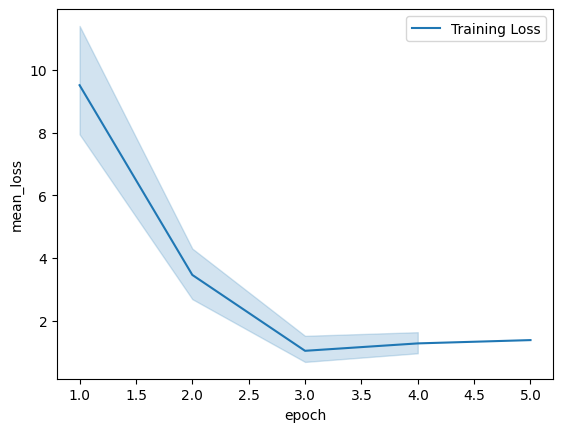

In [19]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

print(snapshots.columns)

sns.lineplot(data=snapshots, x='epoch', y='mean_loss', label='Training Loss')

## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [12]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [13]:
result = model.generate_content('apa itu dts')
result.text

'DTS adalah singkatan dari Digital Talent Scholarship, yaitu program pelatihan pengembangan kompetensi yang telah diberikan kepada talenta digital Indonesia sejak tahun 2018. Program ini ditujukan untuk meningkatkan keterampilan dan daya saing angkatan kerja muda Indonesia di bidang teknologi informasi dan komunikasi, sehingga dapat meningkatkan produktivitas dan daya saing bangsa di era industri 4.0. Program DTS secara garis besar dibagi menjadi delapan Akademi, yaitu: 1. Fresh Graduate Academy (FGA) - Lulusan Baru 2. Vocational School Graduate Academy (VGA) - Lulusan Vokasi 3. Thematic Academy (TA) - Pelaku Industri 4.0 4. Professional Academy (ProA) - Pekerja Terampil 5. Startup Academy (SA) - Wirausahawan Digital 6. Government Transformation Academy (GTA) - Aparatur Sipil Negara 7. Digital Entrepreneurship Academy (DEA) - Masyarakat Umum 8. Digital Leadership Academy (DLA) - Pimpinan Digital'

In [14]:
result = model.generate_content('apakah daftar dts berbayar')
result.text

'Tidak, pendaftaran DTS 2023 tidak dikenakan biaya apapun.'

In [15]:
result = model.generate_content('bagaimana cara saya mendaftar dts')
result.text

'Silahkan mengikuti langkah berikut untuk membuat akun DTS:Buat akun DTS terlebih dahulu pada tautan berikut: https://digitalent.kominfo.go.id/registerPenting! Silahkan memperhatikan beberapa hal berikut ini:Nama user minimal 6 karakterEmail dan konfirmasi email harus sama dengan alamat email aktif Anda, karena tautan reset password akan dikirimkan ke alamat email tersebutSilahkan membuat password yang cukup kuat dan susah ditebak, serta mengandung karakter spesialPenting untuk diingat kembali bahwa pendaftaran pelatihan hanya dapat dilakukan satu kali dengan akun yang telah dibuat. Silahkan melengkapi data diri pada profil dan melengkapi data akademik (bagi mahasiswa) selanjutnya dapat memilih pelatihan yang diminati.'

In [16]:
result = model.generate_content('bagaimana cara saya tidak jadi mendaftar dts')
result.text

'Peserta tidak akan diterima dalam pelatihan jika mengundurkan diri. Sertifikat juga tidak akan diberikan kepada peserta yang mengundurkan diri. Jika ingin melanjutkan pelatihan kembali, silahkan daftar ulang kembali dan pastikan untuk melengkapi semua persyaratan yang dibutuhkan.'

In [17]:
result = model.generate_content('apakah lulusan SMK bisa ikut dts')
result.text

'Ya, lulusan SMK dapat mendaftar DTS. Peserta tidak hanya dituntut untuk memiliki gelar kesarjanaan, namun juga kompetensi. Silahkan cek pada Silabus setiap pelatihan, untuk mengetahui persyaratan akademik pada masing-masing pelatihan.'

In [18]:
result = model.generate_content('keuntungan apa yang saya dapatkan selama dts')
result.text

'Peserta yang telah menyelesaikan pelatihan sampai selesai akan mendapatkan beberapa benefit:Sertifikat CompletionKesempatan Sertifikasi InternasionalAkses materi Mentor Class di Platform DiployAkses Virtual Internship di Platform DiployPenggantian Uang Pulsa*benefit yang diberikan tergantung akademi pelatihan dan tema pelatihan yang dipilih'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
